In [15]:
import os, glob, random
import cv2
import visualization as viz

class PreprocessingMulti:
    def __init__(self, folderL, classL, addPath=None): # output = os.path.dirname(folderL[0]) # addPath determine whether active cycle >=1
        self.imgPathL = []
        self.antPathL = []
        for folder in folderL:
            imgPathS = set(glob.glob(f"{folder}/*.jpg"))
            antPathS = set(glob.glob(f"{folder}/*.txt"))
            self.imgPathL += sorted([ os.path.abspath(ip) for ip in imgPathS if ip.replace('.jpg','.txt') in antPathS ])
            self.antPathL += sorted([ os.path.abspath(ap) for ap in antPathS if ap.replace('.txt','.jpg') in imgPathS ])
        self.addPath = addPath
        self.classL = classL
        print(f"self.classL={self.classL}, len(self.imgPathL)={len(self.imgPathL)}, len(self.antPathL)={len(self.antPathL)}")
        
    def visualize(self, num=2):
        R = list(range(len(self.imgPathL)))
        random.shuffle(R)
        for idx in R[:num]:
            viz.show(self.imgPathL[idx], self.antPathL[idx], classList=self.classL)
    
    def generate_txt(self):
        if self.addPath:
            self.imgPathL += [ path.replace('\n','') for path in open(f"{self.addPath}/train.txt","r").readlines() if ".jpg" in path ]
            self.antPathL += [ path.replace('\n','') for path in open(f"{self.addPath}/train.txt","r").readlines() if ".txt" in path ]
        R = list(range(len(self.imgPathL)))
        random.Random(7).shuffle(R)
        outputPath = "/".join( self.imgPathL[0].split("/")[:-2] )
        # train.txt
        with open(f"{outputPath}/train.txt", "w") as f:
            for idx in R[:None if self.addPath else int(len(R)*0.8)]:
                f.write(self.imgPathL[idx]+"\n"+self.antPathL[idx]+"\n")
        # val.txt
        if self.addPath:
            os.system(f"cp {self.addPath}/val.txt {outputPath}")
        else:
            with open(f"{outputPath}/val.txt", "w") as f:
                for idx in R[int(len(R)*0.8):]:
                    f.write(self.imgPathL[idx]+"\n"+self.antPathL[idx]+"\n")
        
    def getCounts(self):
        outputPath = "/".join( self.imgPathL[0].split("/")[:-2] )
        imgCount = [0]*2
        classCount = [ [0]*len(self.classL) for i in range(2) ]
        for i,mode in enumerate(['train','val']):
            for line in open(f"{outputPath}/{mode}.txt", "r").readlines():
                if line[-5:-1]==".jpg":
                    imgCount[i]+=1
                else:
                    for subline in open(line[:-1],"r").readlines():
                        cid, cx, cy, w, h = subline[:-1].split(" ")
                        classCount[i][int(cid)]+=1
        print(f"trainImgcount={imgCount[0]}, valImgCount={imgCount[1]}")
        print(f"trainClassCount={classCount[0]}, valClassCount={classCount[1]}")

self.classL=['tetra'], len(self.imgPathL)=227, len(self.antPathL)=227


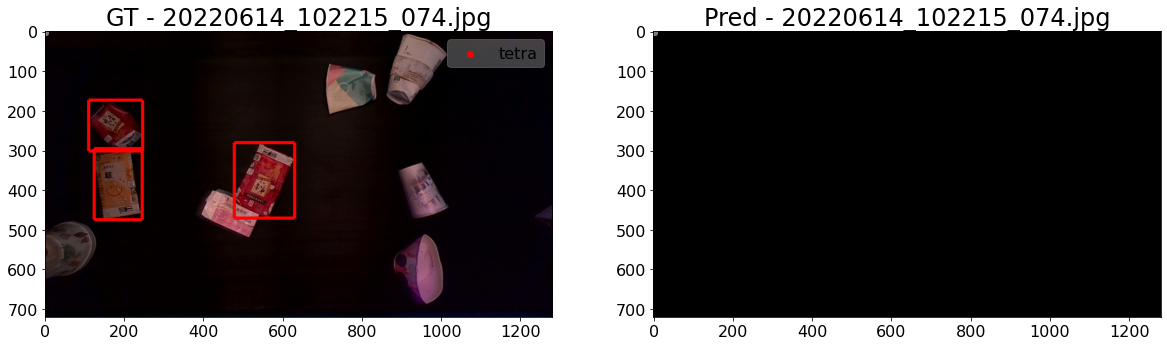

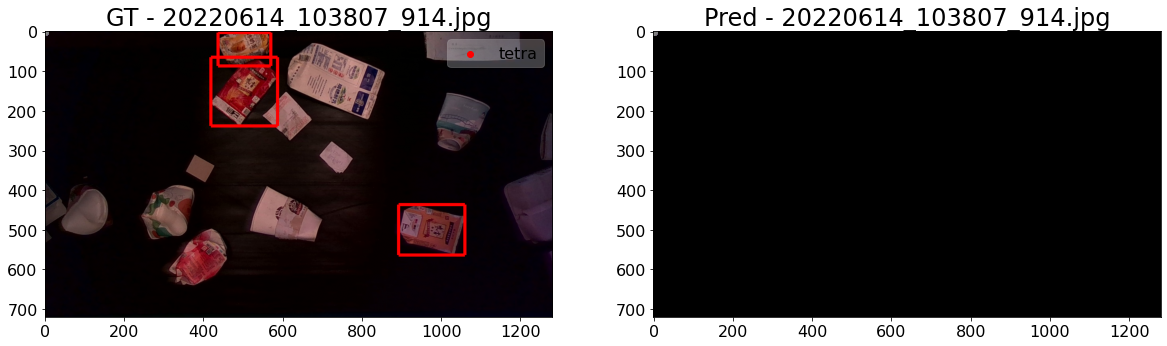

trainImgcount=181, valImgCount=46
trainClassCount=[309], valClassCount=[86]


In [16]:
obj = PreprocessingMulti( ["../_data/sampleV3/data"], ['tetra'] )
obj.visualize(num=2)
obj.generate_txt()
obj.getCounts()

self.classL=['tetra'], len(self.imgPathL)=320, len(self.antPathL)=320


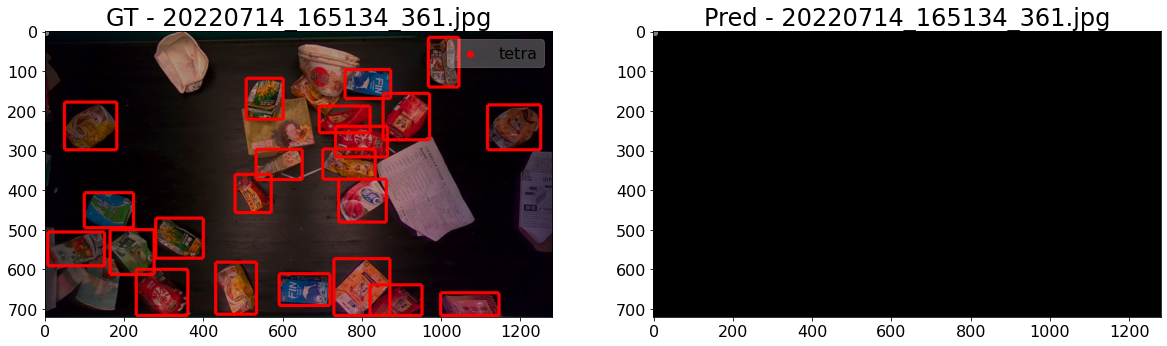

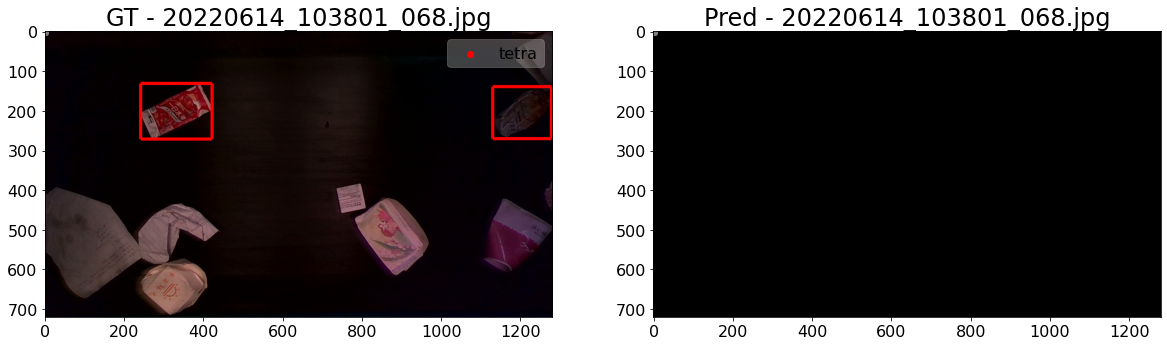

trainImgcount=256, valImgCount=64
trainClassCount=[2004], valClassCount=[472]


In [5]:
obj = PreprocessingMulti(["../_data/sampleV4/data"], ['tetra'])
obj.visualize(num=2)
obj.generate_txt()
obj.getCounts()

self.classL=['tetra'], len(self.imgPathL)=58, len(self.antPathL)=58


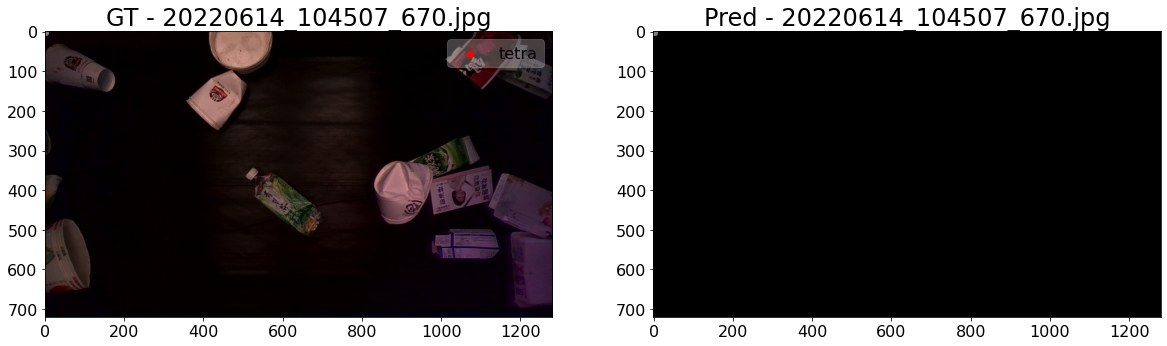

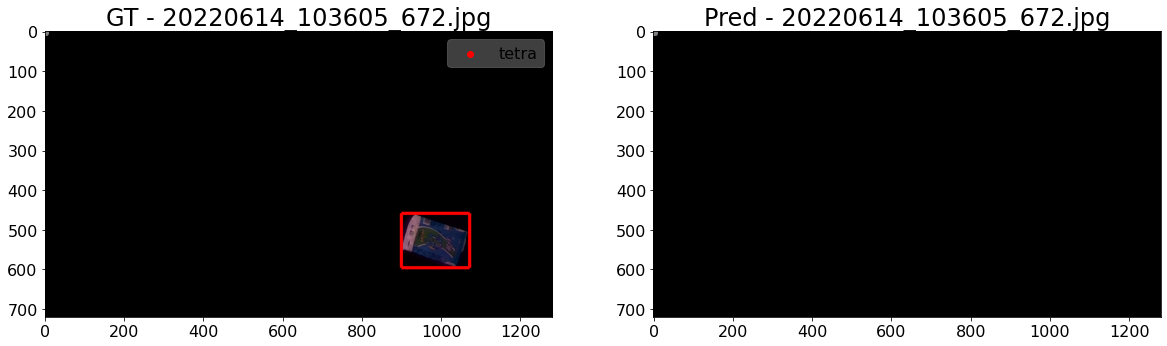

trainImgcount=314, valImgCount=64
trainClassCount=[2055], valClassCount=[472]


In [17]:
# active cycle-1
obj = PreprocessingMulti(["../_data/sampleV4_pseudoV0/easy", "../_data/sampleV4_pseudoV0/hard_fixed"], ['tetra'], "../_data/sampleV4")
obj.visualize(num=2)
obj.generate_txt()
obj.getCounts()